In [ ]:
#Basic Libraries
import pandas as pd
import numpy as np
#Data Preprocessing
from sklearn.preprocessing import StandardScaler
#Data Clustering
from sklearn.cluster import KMeans
#Visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load the dataset
ifood_df = pd.read_csv('ifood_df.csv')
#Taking a look at the top 5 rows of the data
ifood_df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [ ]:
# Correct negative values in MntRegularProds to zero
ifood_df['MntRegularProds'] = ifood_df['MntRegularProds'].apply(lambda x: max(x, 0))
# Display the first few rows to check the changes
print(ifood_df.head())

   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0   58138        0         0       58       635         88              546   
1   46344        1         1       38        11          1                6   
2   71613        0         0       26       426         49              127   
3   26646        1         0       26        11          4               20   
4   58293        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  ...  marital_Together  \
0              172                88            88  ...                 0   
1                2                 1             6  ...                 0   
2              111                21            42  ...                 1   
3               10                 3             5  ...                 1   
4               46                27            15  ...                 0   

   marital_Widow  education_2n Cycle  education_Basic  educati

In [ ]:
#Reviewing data columns and comparing them to the dataset description
ifood_df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Customer_Days',
       'marital_Divorced', 'marital_Married', 'marital_Single',
       'marital_Together', 'marital_Widow', 'education_2n Cycle',
       'education_Basic', 'education_Graduation', 'education_Master',
       'education_PhD', 'MntTotal', 'MntRegularProds', 'AcceptedCmpOverall'],
      dtype='object')

In [ ]:
#no missing values in the data and there are 2,205 observations in the data frame
ifood_df.isna().sum()

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpOverall      0
dtype: int64

In [ ]:
# Drop known redundant columns
ifood_df.drop(columns=['Z_CostContact', 'Z_Revenue'], inplace=True)

# Calculate the number of unique values in each column
unique_values = ifood_df.nunique()

# Identify columns to drop (example: columns with only one unique value)
columns_to_drop = unique_values[unique_values == 1].index.tolist()

# Drop the identified columns
ifood_df.drop(columns=columns_to_drop, inplace=True)

# Display the unique values after dropping the columns
unique_values_after_dropping = ifood_df.nunique()
print(unique_values_after_dropping)

# Display the cleaned dataframe's information
print(ifood_df.info())

Income                  1963
Kidhome                    3
Teenhome                   3
Recency                  100
MntWines                 775
MntFruits                158
MntMeatProducts          551
MntFishProducts          182
MntSweetProducts         176
MntGoldProds             212
NumDealsPurchases         15
NumWebPurchases           15
NumCatalogPurchases       13
NumStorePurchases         14
NumWebVisitsMonth         16
AcceptedCmp3               2
AcceptedCmp4               2
AcceptedCmp5               2
AcceptedCmp1               2
AcceptedCmp2               2
Complain                   2
Response                   2
Age                       56
Customer_Days            662
marital_Divorced           2
marital_Married            2
marital_Single             2
marital_Together           2
marital_Widow              2
education_2n Cycle         2
education_Basic            2
education_Graduation       2
education_Master           2
education_PhD              2
MntTotal      

In [ ]:
#Calculate RFM Metrics
# Calculate Recency using 'Customer_Days' (assuming it indicates days since registration or last purchase)
ifood_df['Recency'] = ifood_df['Customer_Days']

# Calculate Frequency by summing up purchase-related columns
ifood_df['Frequency'] = ifood_df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

# Calculate Monetary by summing up spend-related columns
ifood_df['Monetary'] = ifood_df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Select the RFM columns
rfm_df = ifood_df[['Recency', 'Frequency', 'Monetary']]

# Display the first few rows
print(rfm_df.head())


   Recency  Frequency  Monetary
0     2822         25      1617
1     2272          6        27
2     2471         21       776
3     2298          8        53
4     2320         19       422


In [ ]:
# Normalize the Data
from sklearn.preprocessing import StandardScaler

# Scaling RFM values
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_df)

# Convert scaled data back to a DataFrame for easier manipulation
rfm_scaled_df = pd.DataFrame(rfm_scaled, columns=['Recency', 'Frequency', 'Monetary'])

In [ ]:
#Apply K-Means Clustering
# Assume the optimal number of clusters is 4 (for example)
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
rfm_df['Cluster'] = kmeans.fit_predict(rfm_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-11-d5e5cdbd9280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_df['Cluster'] = kmeans.fit_predict(rfm_scaled)


In [ ]:
# Calculate Recency, Frequency, and Monetary metrics
ifood_df['Recency'] = ifood_df['Customer_Days']
ifood_df['Frequency'] = ifood_df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)
ifood_df['Monetary'] = ifood_df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Create RFM DataFrame
rfm_df = ifood_df[['Recency', 'Frequency', 'Monetary']]

# Calculate average purchase value, frequency of purchases, etc.
avg_purchase_value = rfm_df['Monetary'].mean()
purchase_frequency = rfm_df['Frequency'].mean()

print(f'Average Purchase Value: {avg_purchase_value}')
print(f'Frequency of Purchases: {purchase_frequency}')


Average Purchase Value: 606.821768707483
Frequency of Purchases: 14.88798185941043


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

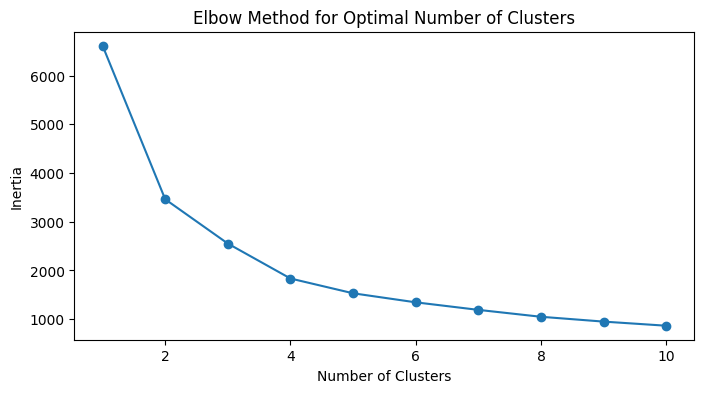

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-16-b69c7997d8fc>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_df['Cluster'] = kmeans.fit_predict(rfm_scaled)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Scale the RFM values
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_df)

# Determine the optimal number of clusters
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

# Plot the inertia values to find the elbow point
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

# Apply K-Means clustering with the optimal number of clusters
optimal_clusters = 4  # assuming 4 is the optimal number from the elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
rfm_df['Cluster'] = kmeans.fit_predict(rfm_scaled)


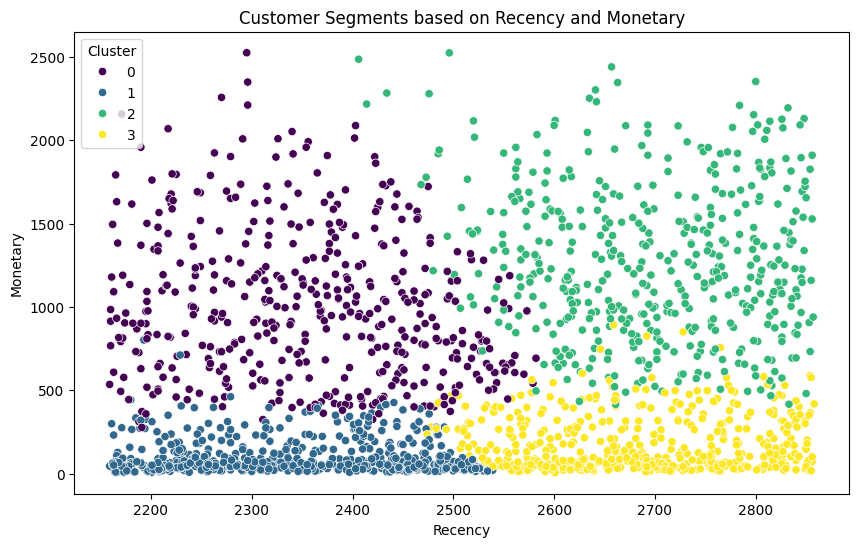

   Cluster      Recency  Frequency     Monetary
0        0  2354.538614  20.384158  1012.968317
1        1  2337.347003   7.859621    99.435331
2        2  2698.154286  22.868571  1265.645714
3        3  2685.939002  10.249538   182.970425


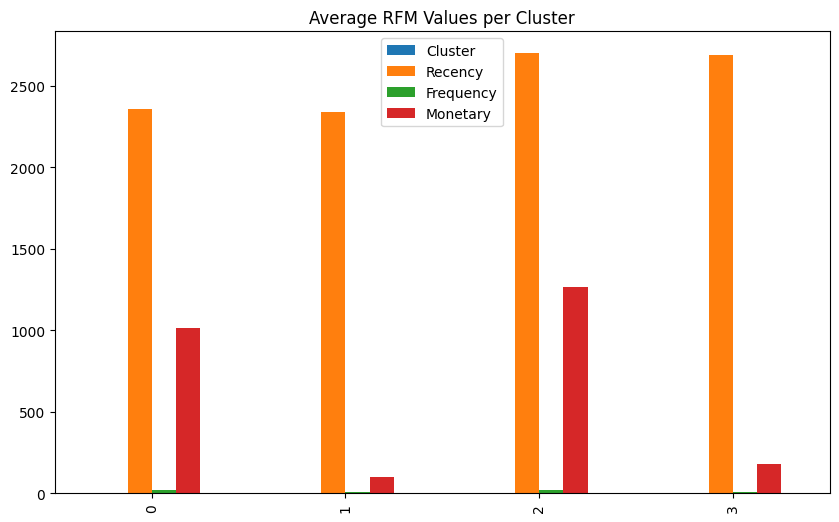

In [ ]:
import seaborn as sns

# Visualize clusters based on Recency and Monetary
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm_df, x='Recency', y='Monetary', hue='Cluster', palette='viridis')
plt.title('Customer Segments based on Recency and Monetary')
plt.show()

# Bar chart for average RFM values per cluster
cluster_profiles = rfm_df.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).reset_index()

print(cluster_profiles)

# Visualization
cluster_profiles.plot(kind='bar', figsize=(10, 6))
plt.title('Average RFM Values per Cluster')
plt.show()


In [ ]:
# Analyze characteristics of each cluster
for cluster in range(optimal_clusters):
    cluster_data = rfm_df[rfm_df['Cluster'] == cluster]
    print(f'Cluster {cluster}')
    print(cluster_data.describe())

# Provide insights based on the cluster profiles
high_value_customers = rfm_df[rfm_df['Cluster'] == 0]  # assuming cluster 0 has high-value customers
print(f'High-Value Customers: {len(high_value_customers)}')

# Recommendations
print('Recommendations:')
print('1. Target high-value customers with exclusive offers.')
print('2. Engage at-risk customers with reactivation campaigns.')
print('3. Reward loyal customers with loyalty programs.')
print('4. Personalize marketing strategies based on customer segments.')


Cluster 0
           Recency   Frequency     Monetary  Cluster
count   505.000000  505.000000   505.000000    505.0
mean   2354.538614   20.384158  1012.968317      0.0
std     110.658988    3.788944   441.488134      0.0
min    2159.000000   11.000000   277.000000      0.0
25%    2263.000000   17.000000   660.000000      0.0
50%    2359.000000   20.000000   963.000000      0.0
75%    2442.000000   23.000000  1280.000000      0.0
max    2582.000000   32.000000  2525.000000      0.0
Cluster 1
           Recency   Frequency    Monetary  Cluster
count   634.000000  634.000000  634.000000    634.0
mean   2337.347003    7.859621   99.435331      1.0
std     106.829356    3.141856  101.741237      0.0
min    2159.000000    0.000000    6.000000      1.0
25%    2244.250000    5.000000   36.250000      1.0
50%    2330.500000    7.000000   60.500000      1.0
75%    2429.000000   10.000000  122.000000      1.0
max    2539.000000   17.000000  801.000000      1.0
Cluster 2
           Recency   Freq